# Import Modules

In [1]:
import os
import random
import numpy as np
import numpy.matlib

from skimage import io

# Show original image

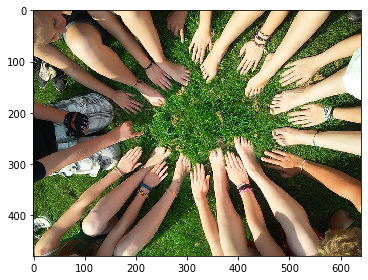

In [2]:
original_image = io.imread('../images/before-compression/hands.png')

io.imshow(original_image)
io.show()

# Get width and length from image

In [3]:
length         = original_image.shape[0]
width          = original_image.shape[1]
original_image = original_image / 255

X = original_image.reshape(original_image.shape[0]*original_image.shape[1], 3)

# Determine Cluster and Max Iteration

In [4]:
number_of_cluster = 16
max_iters         = 50

# Function Initialize centroid

In [5]:
def init_centroids(X, number_of_clusters):
    c = random.sample(list(X), number_of_clusters)
    
    return c

# Determine closest centroid for each datapoint (pixel)

In [6]:
def closest_centroids(X, c):
    number_of_cluster = np.size(c,0)
    idx               = np.zeros((np.size(X,0),1))
    arr               = np.empty((np.size(X,0),1))
    
    for i in range(0,number_of_cluster):
        y    = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b    = np.power(np.subtract(X,temp),2)
        a    = np.sum(b,axis = 1)
        a    = np.asarray(a)
        
        a.resize((np.size(X,0),1))
        arr  = np.append(arr, a, axis=1)
        
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    
    return idx

# Generate

In [7]:
def compute_centroids(X, idx, number_of_cluster):
    n = np.size(X, 1)
    centroids = np.zeros((number_of_cluster, n))
    
    for i in range(0, number_of_cluster):
        ci           = idx==i
        ci           = ci.astype(int)
        total_number = sum(ci)
        
        ci.resize((np.size(X,0),1))
        
        total_matrix = np.matlib.repmat(ci,1,n)
        ci           = np.transpose(ci)
        total        = np.multiply(X,total_matrix)
        centroids[i] = (1 / total_number) * np.sum(total, axis=0)
        
    return centroids

# KMeans Clustering

In [8]:
def run_kMean(X, initial_centroids, max_iters):
    m                  = np.size(X, 0)
    n                  = np.size(X, 1)
    number_of_cluster  = np.size(initial_centroids, 0)
    centroids          = initial_centroids
    previous_centroids = centroids
    idx                = np.zeros((m,1))
    
    for i in range(1,max_iters):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, number_of_cluster)
        
    return centroids,idx

# Generate

In [9]:
initial_centroids = init_centroids(X, number_of_cluster)
centroids, idx    = run_kMean(X, initial_centroids, max_iters)

print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(307200,)


# Generate

In [10]:
idx         = closest_centroids(X, centroids)
X_recovered = centroids[idx]
X_recovered = np.reshape(X_recovered, (length, width, 3))

print(np.shape(X_recovered))
print(np.shape(X_recovered))

(480, 640, 3)
(480, 640, 3)


In [11]:
print(X_recovered)

[[[0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  ...
  [0.24209294 0.21937691 0.13241229]
  [0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]]

 [[0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  ...
  [0.24209294 0.21937691 0.13241229]
  [0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]]

 [[0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  [0.38165071 0.29204714 0.2121303 ]
  ...
  [0.24209294 0.21937691 0.13241229]
  [0.24209294 0.21937691 0.13241229]
  [0.24209294 0.21937691 0.13241229]]

 ...

 [[0.22996301 0.38042991 0.09638772]
  [0.33112691 0.47756157 0.19060198]
  [0.33112691 0.47756157 0.19060198]
  ...
  [0.24209294 0.21937691 0.13241229]
  [0.24209294 0.21937691 0.13241229]
  [0.24209294 0.21937691 0.13241229]]

 [[0.33112691 0.47756157 0.19060198]
  [0.33112691 0.47756157 0.19060198]


# Show image compressed

In [12]:
image_compressed = io.imsave('../images/after-compression/hands-result.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


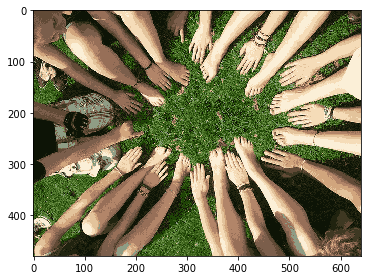

In [13]:
image_compressed = io.imread('../images/after-compression/hands-result.png')

io.imshow(image_compressed)
io.show()

# Image size before and after compression with KMeans

In [14]:
size_before_compression = os.stat('../images/before-compression/hands.png')
size_after_compression = os.stat('../images/after-compression/hands-result.png')

print("Size of image before running K-mean algorithm: ", size_before_compression.st_size/1024,"KB")
print("Size of image after running K-mean algorithm: ", size_after_compression.st_size/1024,"KB")

Size of image before running K-mean algorithm:  108.78125 KB
Size of image after running K-mean algorithm:  198.884765625 KB
